In [31]:
getwd()
library("data.table")
library("stm")
integrumreg <- fread("/work/cloud-user/russia_finland/finland_russia/data/processed/integrum_local.csv")



[1] "/work/cloud-user/russia_finland/finland_russia"

In [32]:
head(integrumreg)

id    date       MediaDetail       MediaShort       
1 25380 05.06.2000 Деловой Петербург Деловой Петербург
2 25381 05.06.2000 Деловой Петербург Деловой Петербург
3 25382 09.06.2000 Деловой Петербург Деловой Петербург
4 25383 09.06.2000 Деловой Петербург Деловой Петербург
5 25384 14.06.2000 Деловой Петербург Деловой Петербург
6 25385 14.06.2000 Деловой Петербург Деловой Петербург
  headline                          
1 Таможню разблокировали            
2 Чем хуже-тем лучше                
3 &lt;Газпром&gt; протянул ветку    
4 Бизнесмены дрались клюшками       
5 Kvaerner исчез с карты области    
6 Шляпным пиратам объявляют амнистию
  content                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

ERROR: Error in head(integrumreg): object 'integrumreg' not found


In [18]:
##remove columns to make the file thinner
integrumreg_id_year_lemma <- integrumreg[,c("id", "year", "lemmas_content")]

In [19]:
articlesintegrumreg <- as.data.frame(integrumreg_id_year_lemma)


In [20]:
head(articlesintegrumreg)

id    year
1 25380 2000
2 25381 2000
3 25382 2000
4 25383 2000
5 25384 2000
6 25385 2000
  lemmas_content                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [21]:
library("tm")
darianstopwords <- c(stopwords("russian"), "/n", "quot","nbsp","/n")

In [23]:
regional_processed <- textProcessor(
  articlesintegrumreg$lemmas_content, 
  metadata = articlesintegrumreg,
  stem=FALSE,
  customstopwords = darianstopwords)

#saveRDS(regional_processed, "processed_integrum_regional.rds")

Building corpus... 
Converting to Lower Case... 
Removing punctuation... 
Removing stopwords... 
Remove Custom Stopwords...
Removing numbers... 
Creating Output... 


In [24]:
##
regional_out <- prepDocuments(
  regional_processed$documents, 
  regional_processed$vocab,
  regional_processed$meta,
  lower.thresh = 15)

#saveRDS(regional_out, "out_integrum_regional.rds")

##
regional_model_fit <- stm(
  regional_out$documents, 
  regional_out$vocab, 
  K = 30,
  prevalence =~ year, 
  max.em.its = 100,
  data = regional_out$meta, 
  init.type = "Spectral")

#saveRDS(regional_model_fit, "STMreg30.rds")

Removing 156661 of 188943 terms (433219 of 9134660 tokens) due to frequency 
Your corpus now has 36017 documents, 32282 terms and 8701441 tokens.Beginning Spectral Initialization 
	 Calculating the gram matrix...
	 Using only 10000 most frequent terms during initialization...
	 Finding anchor words...
 	..............................
	 Recovering initialization...
 	....................................................................................................
Initialization complete.
....................................................................................................
Completed E-Step (171 seconds). 
Completed M-Step. 
Completing Iteration 1 (approx. per word bound = -8.720) 
....................................................................................................
Completed E-Step (184 seconds). 
Completed M-Step. 
Completing Iteration 2 (approx. per word bound = -8.053, relative change = 7.649e-02) 
......................................................

In [30]:
##
regional_prep <- estimateEffect(1:30 ~ year, regional_model_fit,meta = regional_out$meta, uncertainty = "Global")
saveRDS(regional_prep, "prepReg30.rds")

In [34]:
library("stm")

In [35]:
reggional_out <- readRDS('out_integrum_regional.rds')
regional_model_fit <- readRDS('STMreg30.rds')

In [36]:
regional_prep1 <- estimateEffect(1:30 ~ s(year), regional_model_fit,meta = regional_out$meta, uncertainty = "Global")
saveRDS(regional_prep1, "prepReg30_1.rds")

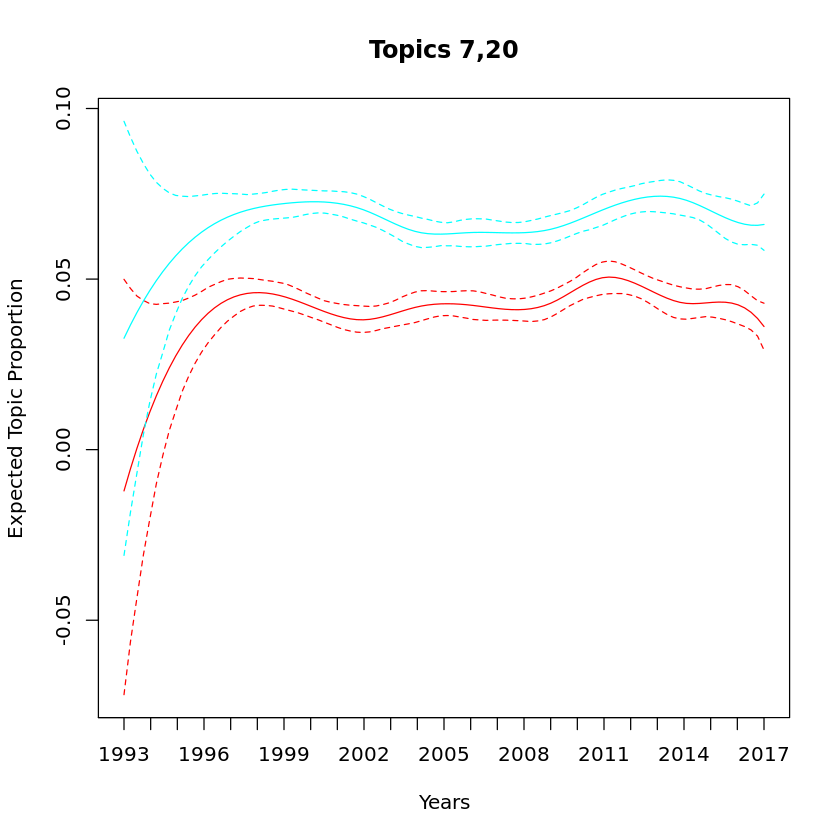

In [43]:
plot(
  regional_prep1, "year", 
  method = "continuous", 
  topics = c(7,20), 
  printlegend = FALSE,
  xaxt = "n",
  xlab = "Years",
  main = "Topics 7,20")
axis(1,at=seq(from=1992, to=2017,by=1))

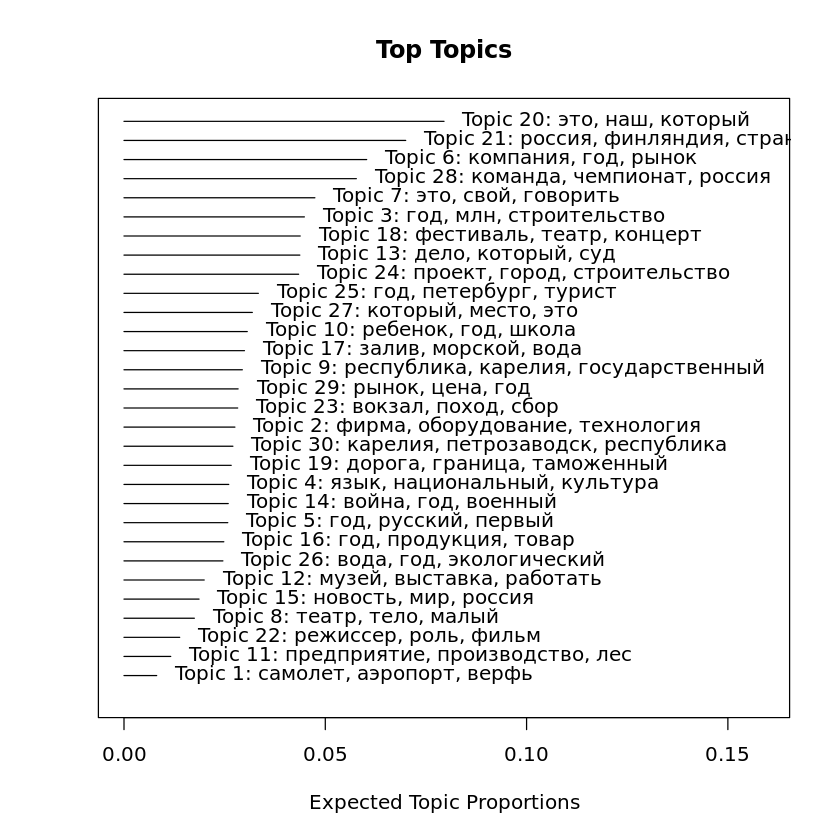

In [27]:
plot(regional_model_fit, "summary")

In [29]:
labelTopics(regional_model_fit, topics = NULL, n = 10, frexweight = 0.8)

Topic 1 Top Words:
 	 Highest Prob: самолет, аэропорт, верфь, пулково, воздушный, ледокол, судно, полет, рейс, завод 
 	 FREX: верфь, авиакомпания, пулково, судостроительный, аэропорт, самолет, судостроение, воздушный, ледокол, оск 
 	 Lift: arctech, аэропортовый, дизельэлектрический, shipyard, yards, авиапредприятие, атомоход, аэровокзал, винторулевой, финнэйр 
 	 Score: ледокол, самолет, аэропорт, авиакомпания, пулково, верфь, оск, рейс, судостроительный, судно 
Topic 2 Top Words:
 	 Highest Prob: фирма, оборудование, технология, материал, система, работа, который, новый, качество, техника 
 	 FREX: клиника, фирма, оборудование, аукцион, мобильный, технология, конструкция, материал, электронный, компьютер 
 	 Lift: кровельный, aemtech, karel, pzm, аэм, гпб, задаток, кладочный, межкомнатный, металлопластиковый 
 	 Score: оборудование, технология, фирма, производитель, клиника, заказчик, строительный, задаток, услуга, pzm 
Topic 3 Top Words:
 	 Highest Prob: год, млн, строительство, ру

In [25]:
##
labelTopics(regional_model_fit, topics = NULL, n = 10, frexweight = 0.8)
plot(regional_model_fit, "summary")
plot(regional_model_fit)
plot(regional_model_fit,type="hist")

## table with topic-to-documnt
reg30dt <- make.dt(regional_model_fit, meta = NULL)
saveRDS <- (reg30dt, "document_topic_reg.rds")

##
plot(
  regional_prep, "year", 
  method = "continuous", 
  topics = 3, 
  printlegend = FALSE,
  xaxt = "n",
  xlab = "Years",
  main = "Topic 3")
axis(1,at=seq(from=2000, to=2017,by=1))

ERROR: Error in parse(text = x, srcfile = src): <text>:14:20: unexpected ','
13: reg30dt <- make.dt(regional_model.fit, meta = NULL)
14: saveRDS <- (reg30dt,
                       ^


In [ ]:
regional_model_fitKn <- stm(regional_out$documents, regional_out$vocab, K = 0, 
                   prevalence =~ year, max.em.its = 100, data = regional_out$meta, init.type = "Spectral")
saveRDS(regional_model_fitKn, "STMregn.rds")


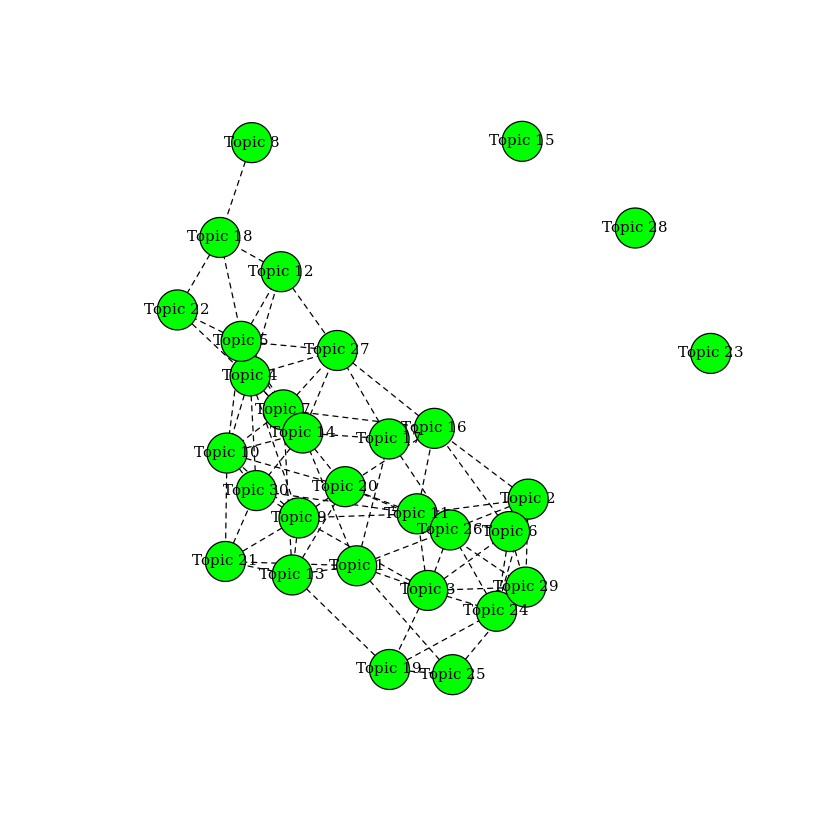

In [33]:
#regional_model_fit <- readRDS('energy_model_fit.RDs')
mod.out.corr <- topicCorr(regional_model_fit)
plot(mod.out.corr)
#plot(mod.out.corr, topics = c(5, 12, 22, 28), vlabels = c("LNG and natural gas", "Ukrainan gas pipeline",
    #"Russia-Ukraine -relations", "Oil price", "Price of gasoline"))

ERROR: Error in textProcessor(articlesintegrumfed$lemmas_content, metadata = articlesintegrumfed, : object 'articlesintegrumfed' not found


Removing 150096 of 179505 terms (421351 of 6817891 tokens) due to frequency 
Removing 2 Documents with No Words 
Your corpus now has 25372 documents, 29409 terms and 6396540 tokens.

Beginning Spectral Initialization 
	 Calculating the gram matrix...
	 Using only 10000 most frequent terms during initialization...
	 Finding anchor words...
 	..............................
	 Recovering initialization...
 	....................................................................................................
Initialization complete.
....................................................................................................
Completed E-Step (147 seconds). 
Completed M-Step. 
Completing Iteration 1 (approx. per word bound = -8.590) 
....................................................................................................
Completed E-Step (78 seconds). 
Completed M-Step. 
Completing Iteration 2 (approx. per word bound = -7.853, relative change = 8.585e-02) 
....................................................................................................
Completed E-Step (64 seconds). 
Completed M-Step. 
Completing Iteration 3 (approx. per word bound =

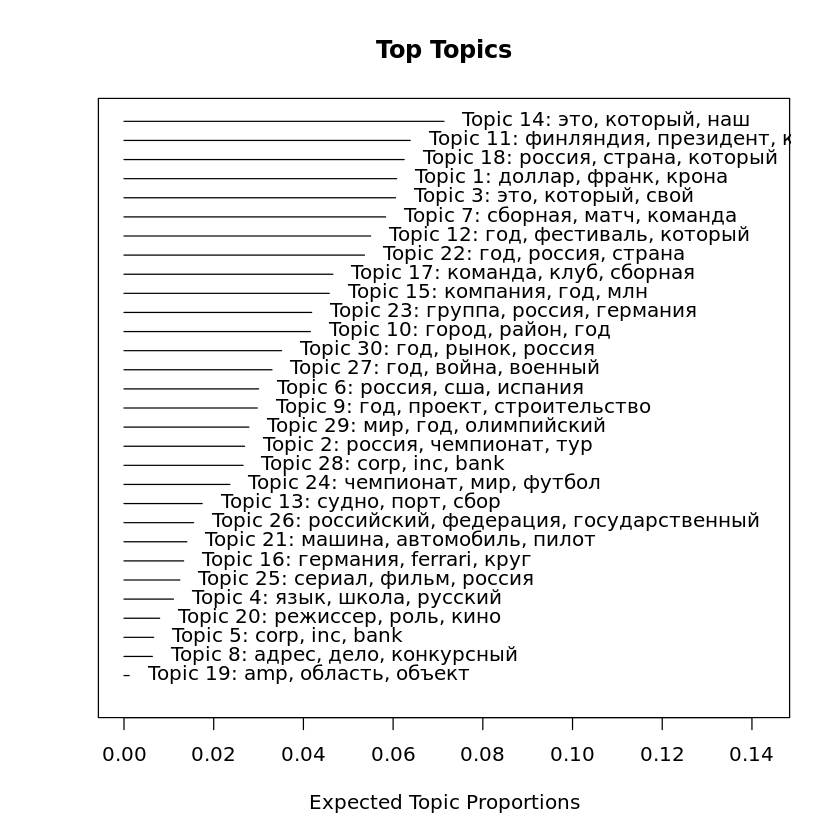

In [73]:
library("wordcloud")
cloud(model.fit, topic=4)

ERROR: Error in library("wordcloud"): there is no package called ‘wordcloud’


docnum Topic1       Topic2       Topic3       Topic4       Topic5      
1 1      0.0006901195 2.438267e-05 2.439581e-01 2.259384e-03 1.040922e-06
2 2      0.0001299479 3.074808e-06 8.341976e-01 5.891056e-03 4.608971e-07
3 3      0.0229743793 2.434512e-05 9.978114e-02 3.225740e-02 3.993688e-05
4 4      0.0002358590 2.034140e-06 2.612714e-02 1.063854e-03 9.683334e-07
5 5      0.0028760743 5.515281e-05 6.015918e-05 4.749332e-05 1.832929e-03
6 6      0.0008610340 3.524449e-05 1.062995e-01 1.391027e-03 3.111428e-06
  Topic6       Topic7       Topic8       Topic9       ⋯ Topic21     
1 7.310084e-06 8.872726e-02 1.442633e-04 2.266917e-04 ⋯ 4.893884e-04
2 2.462573e-05 1.325620e-04 9.360979e-05 7.428406e-06 ⋯ 6.096914e-05
3 1.158428e-04 2.152430e-04 8.318225e-04 1.319245e-03 ⋯ 6.147628e-04
4 1.150532e-05 6.717114e-05 6.131492e-04 1.356235e-04 ⋯ 1.723983e-04
5 6.899709e-05 6.253077e-05 1.111097e-03 5.011018e-01 ⋯ 3.501916e-02
6 6.671804e-06 1.815032e-01 3.550639e-04 3.331124e-04 ⋯ 9.683725e-04
  Topic22      Topic23      Topic24      Topic25      Topic26      Topic27    
1 2.126465e-03 0.0004792781 4.505738e-04 6.747615e-05 0.0001749411 0.001092395
2 9.176003e-05 0.0001164021 3.081403e-05 4.727634e-04 0.0001005632 0.098393130
3 2.027825e-01 0.0084669226 3.095218e-04 6.671543e-04 0.0021002224 0.024463287
4 8.295008e-04 0.0002101939 1.546969e-05 1.014625e-04 0.0068131534 0.334658027
5 7.600209e-02 0.0013788008 5.184128e-05 6.093634e-05 0.0009851557 0.000205302
6 3.954080e-03 0.0008124577 5.788739e-04 7.088138e-05 0.0005914714 0.001328564
  Topic28      Topic29      Topic30     
1 1.447060e-06 0.0058155936 0.0008687164
2 4.365512e-07 0.0004885154 0.0001597694
3 7.337534e-05 0.0016966049 0.0978729255
4 6.117209e-07 0.0002573895 0.0005930705
5 4.951006e-02 0.0001445193 0.0200723060
6 5.379103e-06 0.0083052383 0.0057890101

id Topic4      
1 1  2.259384e-03
2 2  5.891056e-03
3 3  3.225740e-02
4 4  1.063854e-03
5 5  4.749332e-05
6 6  1.391027e-03

id Topic4       year
1 1  2.259384e-03 2003
2 2  5.891056e-03 2003
3 3  3.225740e-02 2003
4 4  1.063854e-03 2003
5 5  4.749332e-05 2003
6 6  1.391027e-03 2003
  lemmas_content                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

id    Topic4   
1 23774 0.9996679
2 23488 0.9994274
3 23560 0.6730085
4  2091 0.5538542
5 15518 0.5437729
6 14627 0.5280459

          id       Topic4 year
    1: 23774 9.996679e-01 2013
    2: 23488 9.994274e-01 2012
    3: 23560 6.730085e-01 2012
    4:  2091 5.538542e-01 2014
    5: 15518 5.437729e-01 2007
    6: 14627 5.280459e-01 2001
    7: 23887 5.172843e-01 2013
    8: 10365 5.067801e-01 2007
    9: 23105 4.937480e-01 2010
   10: 15988 4.834512e-01 2009
   11: 15397 4.827843e-01 2007
   12:   311 4.808139e-01 2004
   13: 15584 4.696633e-01 2007
   14: 15514 4.653518e-01 2007
   15: 18990 4.628821e-01 2012
   16: 23678 4.590981e-01 2012
   17: 23124 4.574141e-01 2011
   18: 15309 4.548548e-01 2006
   19: 23169 4.540781e-01 2011
   20: 15031 4.467528e-01 2004
   ---                        
25348:  2809 1.727959e-06 2000
25349: 23917 1.725265e-06 2013
25350:  9755 1.718934e-06 2007
25351:  7153 1.623713e-06 2004
25352:  8646 1.502024e-06 2005
25353: 23566 1.470241e-06 2012
25354: 21547 1.453545e-06 2007
25355:  5322 1.437476e-06 2002
25356:  6033 1.416804e-06 2003
25357: 21446 1.326975e-06 2007
25358:  

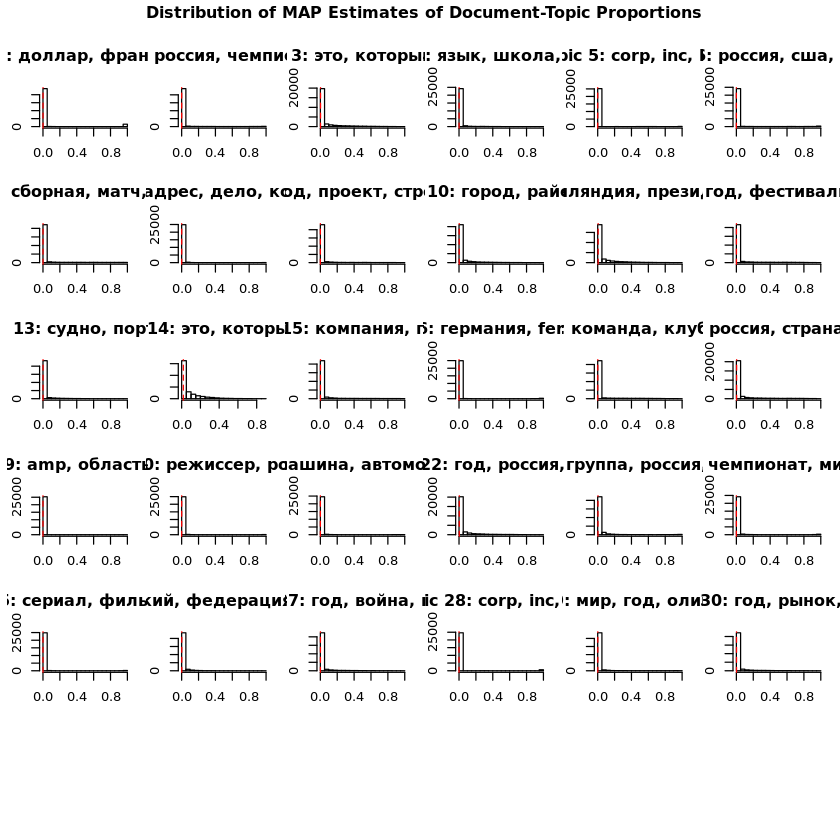

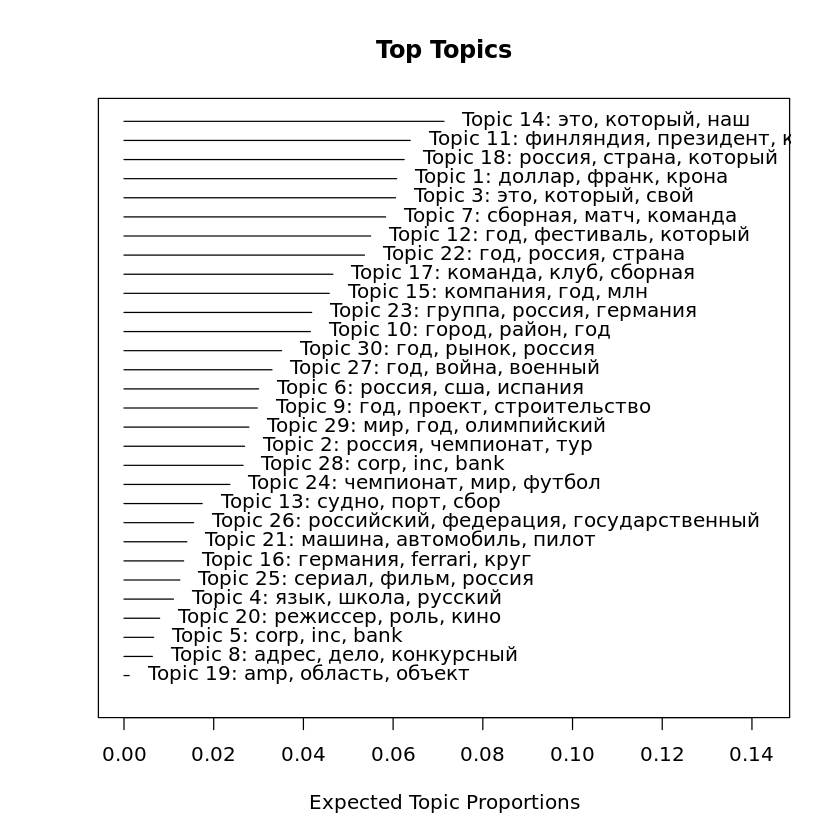

ERROR: Error in findThoughts(model.fit, texts = integrumfed$lemmas_content, topics = 1, : Number of provided texts and number of documents modeled do not match


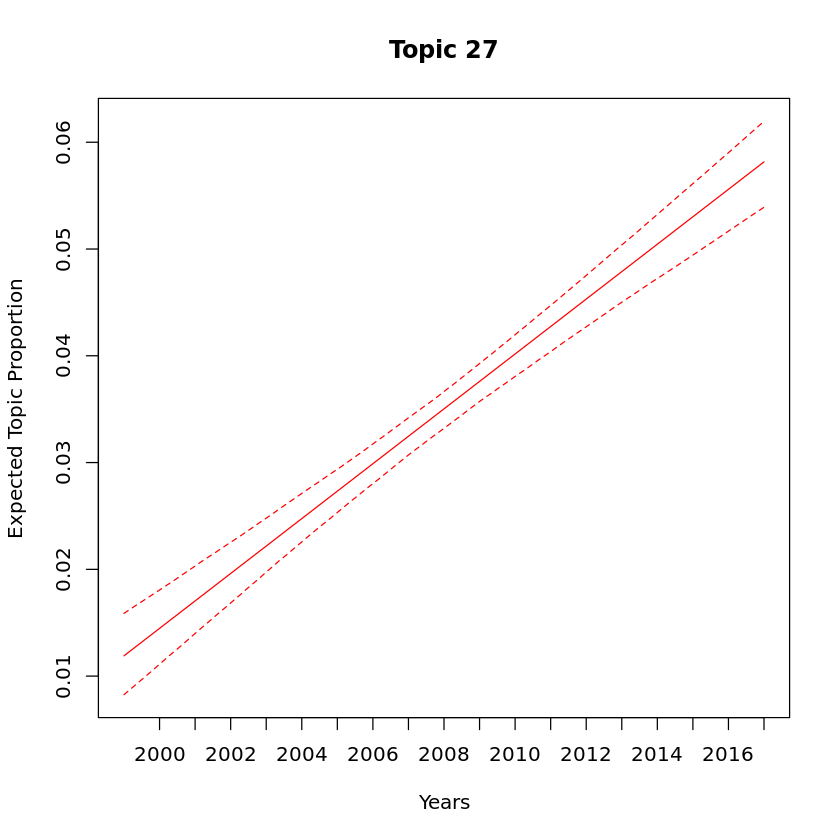

[1] "articlesintegrumfed" "corp"                "corp1"              
 [4] "corp2"               "corp3"               "corp4"              
 [7] "corp5"               "corp6"               "corpdtm"            
[10] "corpLDA10"           "corpLDA30"           "corpvalmis"         
[13] "darianstopwords"     "integrumfed"         "integrumfed_id"     
[16] "integrumreg"         "LDA10terms"          "LDA30terms"         
[19] "model.fit"           "mod.out.corr"        "out"                
[22] "prep"                "processed"           "toSpace"

[1] "articlesintegrumfed" "corp"                "corp1"              
 [4] "corp2"               "corp3"               "corp4"              
 [7] "corp5"               "corp6"               "corpdtm"            
[10] "corpLDA10"           "corpLDA30"           "corpvalmis"         
[13] "darianstopwords"     "integrumfed"         "integrumfed_id"     
[16] "integrumreg"         "LDA10terms"          "LDA30terms"         
[19] "model.fit"           "mod.out.corr"        "out"                
[22] "prep"                "processed"           "toSpace"

Topic 1 Top Words:
 	 Highest Prob: доллар, франк, крона, марка, евро, сша, фунт, английский, шведский, французский 
 	 FREX: крона, франк, доллар, фунт, марка, евро, лира, шведский, английский, итальянский 
 	 Lift: португальск, эскудо, reuter, иена, голландск, драхма, ирландски, лотовой, португаль, тенге 
 	 Score: крона, песета, франк, гульден, эскудо, фунт, иена, лира, доллар, марка 
Topic 2 Top Words:
 	 Highest Prob: россия, чемпионат, тур, очки, германия, норвегия, оба, динамо, положение, кубок 
 	 FREX: финикс, миннесота, филадельфия, даллас, чикаго, ньюджерси, atlanta, бостон, овертайм, детройт 
 	 Lift: athletic, bastia, bologna, brescia, chievo, cibona, clippers, cologne, espanyol, fiorentina 
 	 Score: чемпионат, овертайм, динамо, кубок, матч, очки, буллит, финикс, очко, бросок 
Topic 3 Top Words:
 	 Highest Prob: это, который, свой, год, говорить, наш, становиться, знать, время, жить 
 	 FREX: мама, сидеть, муж, отец, бабушка, ndash, спрашивать, любить, папа, laquo 
 	 Lif

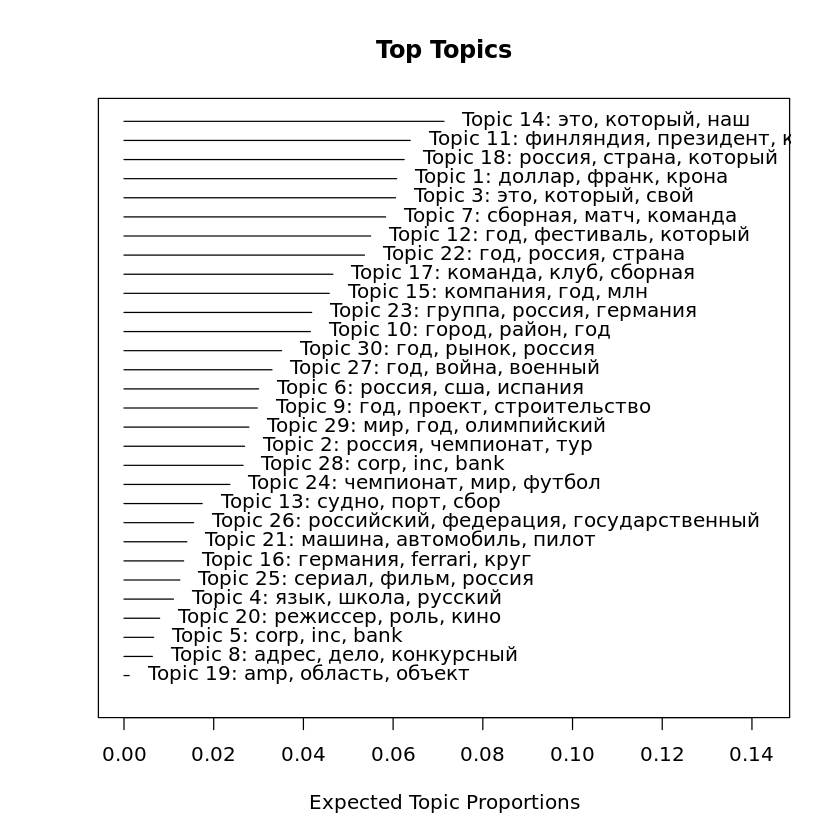

ERROR: Error in library("igraph"): there is no package called ‘igraph’


ERROR: Error in plot.topicCorr(mod.out.corr): Install the igraph package to use this function.
